*********
# Understanding convolution

   1/ Implementing a convolution module from scratch  
   2/ Defining a well known kernel and convolve with a RGB image  
   3/ Comparing the same with the tensorflow conv2d function  
*********

In [1]:
#Load modules

import matplotlib.pyplot as plt
import numpy as np

#install modules to download an image from the web
from PIL import Image
import requests
from io import BytesIO

In [3]:
# Set a kernel (weights). An edge kernel (sobel) picked

kernel = np.array([[1., 2., 0., -2., -1,],[4., 8., 0, -8., -4.], [6., 12., 0, -12., -6.], [4., 8., 0, -8., -4.], [1., 2., 0, -2., -1,]])
kernel_3d = np.zeros((5,5,3))
kernel_3d[:,:,0] = kernel
kernel_3d[:,:,1] = kernel
kernel_3d[:,:,2] = kernel

print('Kernel Shape :', kernel_3d.shape)

Kernel Shape : (5, 5, 3)


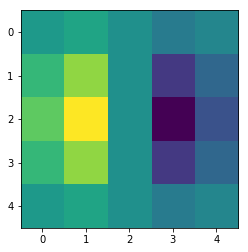

In [4]:
plt.imshow(kernel)
plt.show()

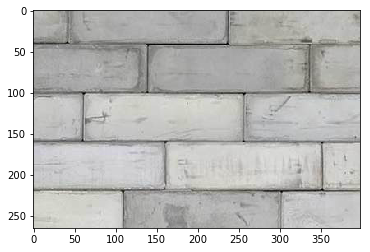

In [5]:
# Load a random image from the web

url = 'http://www.textures.com/system/categories/97530/frontend-large.jpg'
response = requests.get(url)
image = np.asarray(Image.open(BytesIO(response.content)))
plt.imshow(image, cmap='gray')
plt.show()

The conv_2d implementaion is given below, the kernel is moved across the image and the dot products are obtained at each placement. The param stride defines how the filter placement across the image should be. 

Example below shows a single output pixel of the convolution obtained by convolving a RGB window with the kernel filters

Image_window, 
R = $\left[\begin{array}{cccc} 1 & 0 & 1 \\ 1 & 1 & 0 \\0 & 0 & 0 \\ \end{array} \right]$ $\space\space$ 
G = $\left[\begin{array}{cccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\1 & 0 & 0 \\ \end{array}\right] $ $\space\space$
B = $\left[\begin{array}{cccc} 1 & 0 & 1 \\ 0 & 1 & 0 \\0 & 1 & 1\\ \end{array} \right]$

Kernel,
k1 = $\left[\begin{array}{cccc} -1 & 1 & 1 \\ 0 & 1 & 0 \\0 & -1 & 0 \\ \end{array} \right]$ $\space\space$ 
k2 = $\left[\begin{array}{cccc} 1 & 0 & -1 \\ 1 & 1 & 0 \\1 & -1 & 0 \\ \end{array} \right]$ $\space\space$
k3 = $\left[\begin{array}{cccc} 1 & 1 & -1 \\ 1 & -1 & 0 \\1 & -1 & 1\\ \end{array} \right]$

CONV = np.dot(R,k1) + np.dot(G,k2) + np.dot(B,k3) = 1 + 3 -1 = 3

Note: A image volume and a kernel volume convolved gives a single value


In [6]:
def conv_2d(image, kernel):
    m, n, _  = image.shape
    k1, k2,_ = kernel.shape
    
    #Kernel window 
    k1 = int(k1/2)+1
    k2 = int(k2/2)+1
    
    out = np.zeros((m,n))
    stride = 1
    for  i in range(k1, m-k1, stride):
        for j in range(k2,  n-k2, stride):
            out[i,j] = np.sum(image[i-k1:i+k1-1,j-k2:j+k2-1]*kernel)
    return out

In [12]:
#Convolve the image with the kernel
out = conv_2d(image, kernel_3d)
print('The shape of the convolved output is:', out.shape)

The shape of the convolved output is: (265, 398)


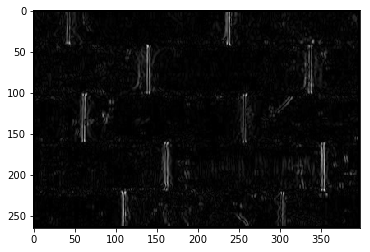

In [13]:
plt.imshow(np.abs(out), cmap='gray')
plt.show()

*********
Now lets try tensorflow and see what we get from the conv2d function
*********

In [11]:
import tensorflow as tf
m, n, ch  = image.shape
k1, k2, dp = kernel_3d.shape

#The weights are initialized to the kernel values
weights = tf.constant(kernel_3d, dtype=tf.float32)
weights = tf.reshape(weights, [k1, k2, dp, 1])

x = tf.constant(image, dtype=tf.float32)
x = tf.reshape(x, [1, m, n, ch])

conv = tf.nn.conv2d(x, weights, strides=[1,1,1,1], padding='SAME')
conv = tf.reshape(conv, [m, n])

with tf.Session() as sess:
    out = sess.run(conv)

print('The shape of the convolved output is:', out.shape)

The shape of the convolved output is: (265, 398)


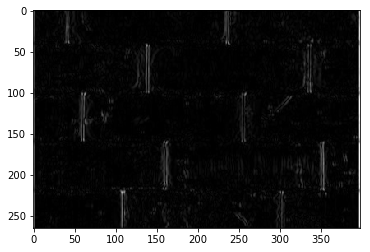

In [10]:
plt.imshow(np.abs(out), cmap='gray')
plt.show()

We can see the output is same as the conv_2d we defined earlier. 

In a convolution neural network the kernels are the weights that are obtained during training. 

The weights(or kernel) has the following shape:[filter_height, filter_width, in_channels, out_channels]. 
    1/ filter_height and filter_width is a hyperparameter that the user needs to define, if the input image is small size, then its advisable to go with a smaller size. 
    2/ in_channels is the image depth - if its RGB then its 3. For higher layers it will be depth of the activation layers. 
    3/ out_channels is another hyperparam which defines 'how many filters do we need for each layer. In our current example, we have only one filter, but a larger number is better.